In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
#загружаем данные
df_start = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df_start['InvoiceDate'] = pd.to_datetime(df_start['InvoiceDate']).dt.strftime("%m-%Y") # сразу оставляем только месяц и год в InvoiceDate

In [5]:
df_start.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-2010,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-2010,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-2010,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-2010,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-2010,1.69,13047.0,United Kingdom


In [6]:
df_start.info()
#есть пропуски тошлько в Description и CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df_start.describe()
#Quantity, UnitPrice принимают как положительные, так и отрицательные значения 
#(отрицательные - предположительно возвраты, нужно прининять решение будут ли эти значения участвовать в расчетах),
#минимум и максимум очень сильно отличается от квантилей, необходимо проверить на выбросы

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#создадим список товаров и посчитаем количество
Code = df_start.StockCode.unique().tolist()
len(Code)

4070

In [9]:
#можно предположить, что коды содержащие пять цифр принадлежат товарам, остальные сопутствующим расходам
#исключаем из списка коды в которых содержится число из 5 цифр

regex = re.compile(r'\d{5}')
filtered_code = [i for i in Code if not regex.match(i)]
print(filtered_code)

['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK']


In [10]:
#Смотрим информацию только по этим позициям

df_1 = df_start[df_start['StockCode'].isin(filtered_code)]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2995 entries, 45 to 541768
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2995 non-null   object 
 1   StockCode    2995 non-null   object 
 2   Description  2980 non-null   object 
 3   Quantity     2995 non-null   int64  
 4   InvoiceDate  2995 non-null   object 
 5   UnitPrice    2995 non-null   float64
 6   CustomerID   1920 non-null   float64
 7   Country      2995 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 210.6+ KB


In [11]:
#смотрим описание и количество по каждой сомнительной позиции
df_sc = df_1.groupby(['StockCode','Description'])['Quantity'].count().reset_index()
df_sc

,StockCode,Description,Quantity
0,AMAZONFEE,AMAZON FEE,34
1,B,Adjust bad debt,3
2,BANK CHARGES,Bank Charges,37
3,C2,CARRIAGE,143
4,CRUK,CRUK Commission,16
5,D,Discount,77
6,DCGS0003,BOXED GLASS ASHTRAY,4
7,DCGS0003,ebay,1
8,DCGS0004,HAYNES CAMPER SHOULDER BAG,1
9,DCGS0067,ebay,1


Видим, что в основном мы верно нашли данные, не имеющие отношения к товару, все что связано с доставкой, комиссиями, образцы, инструкции и подарочные сертификаты, но есть и несколько позиций товаров, их код начинается с 'DCGS', тсключим из списка данные артикулы  

отдельно нужно рассмотреть строки с описанием 'ebay'

In [12]:
#удаляем из списка для фильтрации товары

regex2 = re.compile(r'DCGS')
filtered_code_2 = [i for i in filtered_code if not regex2.match(i)]
print(filtered_code_2)

['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'gift_0001_40', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'gift_0001_10', 'PADS', 'B', 'CRUK']


In [13]:
#удаляем лишние данные
df_2 = df_start.loc[~df_start['StockCode'].isin(filtered_code_2)]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538959 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538959 non-null  object 
 1   StockCode    538959 non-null  object 
 2   Description  537513 non-null  object 
 3   Quantity     538959 non-null  int64  
 4   InvoiceDate  538959 non-null  object 
 5   UnitPrice    538959 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538959 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [14]:
#смотрим что содержат строки с описанием 'ebay'
df_ebay = df_start.loc[df_start['Description'] == 'ebay']
df_ebay
#все имеют нулевую стоимость, поэтому так же удаляем

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279251,561249,DCGS0073,ebay,-4,07-2011,0.0,NaN,United Kingdom
279254,561252,DCGS0069,ebay,-5,07-2011,0.0,NaN,United Kingdom
279255,561253,DCGS0068,ebay,-10,07-2011,0.0,NaN,United Kingdom
279256,561254,DCGS0067,ebay,-11,07-2011,0.0,NaN,United Kingdom
279258,561256,DCGS0003,ebay,-7,07-2011,0.0,NaN,United Kingdom


In [15]:
df_2 = df_2.loc[df_2['Description'] != 'ebay']
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538954 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538954 non-null  object 
 1   StockCode    538954 non-null  object 
 2   Description  537508 non-null  object 
 3   Quantity     538954 non-null  int64  
 4   InvoiceDate  538954 non-null  object 
 5   UnitPrice    538954 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538954 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [17]:
#проверим, есть ли еще товары с нулевой стоимостью
df_0 = df_2.loc[df_2['UnitPrice'] == 0]
df_0.info()
#есть и довольно много, так же мы видим, что сюда попали почти все строки без описания и они составляют больше половины всех строк с нулевой стоимостью

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 622 to 538919
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2492 non-null   object 
 1   StockCode    2492 non-null   object 
 2   Description  1046 non-null   object 
 3   Quantity     2492 non-null   int64  
 4   InvoiceDate  2492 non-null   object 
 5   UnitPrice    2492 non-null   float64
 6   CustomerID   33 non-null     float64
 7   Country      2492 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 175.2+ KB


In [18]:
#посмотрим, сколько артикулов имеют нулевую стоимость
price_0 = df_0.StockCode.unique()
len(price_0)

1406

In [19]:
#заменим пустые строки в описании на Nan и посмотрим какие еще данные они содержат
df_2.Description = df_2.Description.replace('', np.nan)
df_nan = df_2[df_2.Description.isnull()]
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 622 to 538554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1446 non-null   object 
 1   StockCode    1446 non-null   object 
 2   Description  0 non-null      object 
 3   Quantity     1446 non-null   int64  
 4   InvoiceDate  1446 non-null   object 
 5   UnitPrice    1446 non-null   float64
 6   CustomerID   0 non-null      float64
 7   Country      1446 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 101.7+ KB


In [20]:
df_nan.describe()
#видим, что у этих данных есть только количество, стоимость у весех позиций 0.0, заменим так же на на Nan

,Quantity,UnitPrice,CustomerID
count,1446.000000,1446.0,0.0
mean,-12.565007,0.0,NaN
std,238.215923,0.0,NaN
min,-3667.000000,0.0,NaN
25%,-24.000000,0.0,NaN
50%,-3.000000,0.0,NaN
75%,3.000000,0.0,NaN
max,5568.000000,0.0,NaN


In [21]:
df_2.UnitPrice = df_2.UnitPrice.replace(0, np.nan)

In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538954 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538954 non-null  object 
 1   StockCode    538954 non-null  object 
 2   Description  537508 non-null  object 
 3   Quantity     538954 non-null  int64  
 4   InvoiceDate  538954 non-null  object 
 5   UnitPrice    536462 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538954 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [23]:
#заполним пропуски стоимости товаров по средней стоимости с округлением до 2 знаков
df_2['UnitPrice'].fillna(df_2.groupby('StockCode')['UnitPrice'].transform('mean').round(2), inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538954 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538954 non-null  object 
 1   StockCode    538954 non-null  object 
 2   Description  537508 non-null  object 
 3   Quantity     538954 non-null  int64  
 4   InvoiceDate  538954 non-null  object 
 5   UnitPrice    538823 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538954 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [24]:
#смотрим, что теперь товаров с нулевой стоимотью осталось всего 131
df_2[df_2.UnitPrice.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,12-2010,NaN,NaN,United Kingdom
1987,536549,85226A,NaN,1,12-2010,NaN,NaN,United Kingdom
1988,536550,85044,NaN,1,12-2010,NaN,NaN,United Kingdom
2024,536552,20950,NaN,1,12-2010,NaN,NaN,United Kingdom
2026,536554,84670,NaN,23,12-2010,NaN,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,10-2011,NaN,NaN,United Kingdom
431380,573595,79323S,"Unsaleable, destroyed.",-674,10-2011,NaN,NaN,United Kingdom
431382,573597,79341,"Unsaleable, destroyed.",-905,10-2011,NaN,NaN,United Kingdom
431383,573598,79342B,"Unsaleable, destroyed.",-1128,10-2011,NaN,NaN,United Kingdom


In [25]:
#посмотрим описание и количество,там где оно есть, делаем вывод, что все оставшиеся позиции (кроме кошельков, но и с ними ничего не ясно) это какие-то списания. а не продажи 
#принимаем решение удалить данные позиции
df_2[df_2.UnitPrice.isnull()].groupby(['Description'])['Quantity'].sum().reset_index()

,Description,Quantity
0,Found by jackie,1
1,TRAVEL CARD WALLET DOTCOMGIFTSHOP,200
2,Thrown away-rusty,-2376
3,"Unsaleable, destroyed.",-7140
4,adjustment,5
5,damages,-990
6,re-adjustment,-5
7,throw away,-5368
8,thrown away,-1619
9,thrown away-can't sell,-2472


In [26]:
df_2.dropna(subset = ['UnitPrice'], inplace = True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538823 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    538823 non-null  object 
 1   StockCode    538823 non-null  object 
 2   Description  537490 non-null  object 
 3   Quantity     538823 non-null  int64  
 4   InvoiceDate  538823 non-null  object 
 5   UnitPrice    538823 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      538823 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [27]:
#проверим, есть ли позици с нулевым количеством
df_2.loc[df_2['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [28]:
df_2.describe()

,Quantity,UnitPrice,CustomerID
count,538823.000000,538823.000000,404909.000000
mean,9.624855,3.288164,15295.168304
std,218.407490,4.520917,1710.424057
min,-80995.000000,0.030000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,649.500000,18287.000000


In [29]:
df_start.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Разделим датафрейм на 2: df_positive - имеет только положительное количество товара
df_negative - только отрицательное

Судя по описанию отрицательных значений, возвраты товаров имеют тот же номер заказа, что и продажа сдобавление символа 'С' в начале, остальные отрицательные позиции подразумевают списание 
Удалим все отрицательные значения из датафрейма, кроме возврата (или отмены заказа?) товаров покупателями



In [31]:
df_positive = df_2.loc[df_2['Quantity'] > 0]
df_negative = df_2.loc[df_2['Quantity'] < 0]

In [32]:
negative_code = df_negative.InvoiceNo.unique()
len(negative_code) 

4641

In [33]:
regex_negative = re.compile(r'C\d{6}')
filtered_code_negative = [i for i in negative_code if not regex_negative.match(i)]
len(filtered_code_negative)

1219

In [34]:
df_negative = df_negative.loc[~df_negative['InvoiceNo'].isin(filtered_code_negative)]
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 154 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8704 non-null   object 
 1   StockCode    8704 non-null   object 
 2   Description  8704 non-null   object 
 3   Quantity     8704 non-null   int64  
 4   InvoiceDate  8704 non-null   object 
 5   UnitPrice    8704 non-null   float64
 6   CustomerID   8539 non-null   float64
 7   Country      8704 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 612.0+ KB


Обединим данные обратно, таким образом остались только продажи и возвраты товаров с ненулевой стоимостью

In [35]:
df = pd.concat([df_positive, df_negative], keys=['x','y'],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537604 entries, 0 to 537603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    537604 non-null  object 
 1   StockCode    537604 non-null  object 
 2   Description  537036 non-null  object 
 3   Quantity     537604 non-null  int64  
 4   InvoiceDate  537604 non-null  object 
 5   UnitPrice    537604 non-null  float64
 6   CustomerID   404909 non-null  float64
 7   Country      537604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


Посчитаем сумму по каждой покупке, добавим стобец SumInvoice

In [36]:
df['SumInvoice'] = df['Quantity']*df['UnitPrice']

In [37]:
df.describe()

,Quantity,UnitPrice,CustomerID,SumInvoice
count,537604.000000,537604.000000,404909.000000,537604.000000
mean,9.991555,3.286016,15295.168304,18.471999
std,216.763588,4.503858,1710.424057,368.680900
min,-80995.000000,0.030000,12346.000000,-168469.600000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.780000
75%,10.000000,4.130000,16794.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
537599,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12-2011,1.95,14397.0,United Kingdom,-23.40
537600,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-2011,0.83,14397.0,United Kingdom,-9.13
537601,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-2011,10.95,15311.0,United Kingdom,-54.75
537602,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-2011,1.25,17315.0,United Kingdom,-1.25


Построим графики продаж по количеству и проданых единиц и по сумме чека

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [47]:
df_month = df.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()
df_month

,Quantity,SumInvoice
InvoiceDate,,
01-2011,316571,586159.80
02-2011,282495,502610.16
03-2011,379195,698142.08
04-2011,298273,490085.19
05-2011,394219,745778.92
06-2011,386725,741200.20
07-2011,400990,693087.87
08-2011,412966,709367.95
09-2011,566703,1023230.09


<AxesSubplot:title={'center':'Динамика продаж по сумме'}, xlabel='Год', ylabel='Продажи, у.е.'>

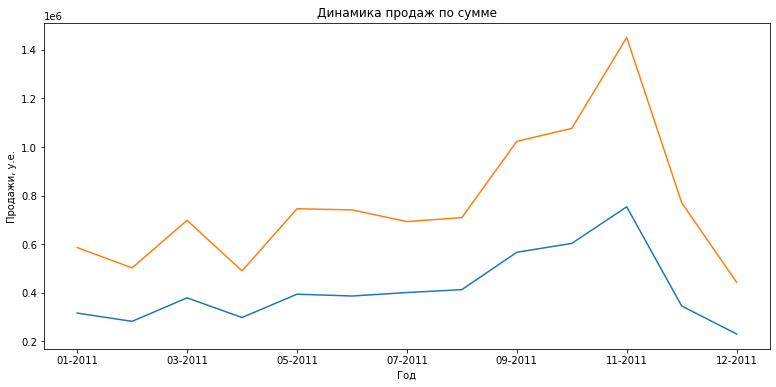

In [102]:
df_month['Quantity'].plot(title='Динамика продаж в единицах', 
                                        xlabel='Год', 
                                        ylabel='Продажи, ед.')
df_month['SumInvoice'].plot(title='Динамика продаж по сумме', 
                                        xlabel='Год', 
                                        ylabel='Продажи, у.е.')

In [87]:
df_UK = df.loc[df['Country'] == 'United Kingdom']
df_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-2010,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-2010,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-2010,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-2010,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-2010,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
537599,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12-2011,1.95,14397.0,United Kingdom,-23.40
537600,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-2011,0.83,14397.0,United Kingdom,-9.13
537601,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-2011,10.95,15311.0,United Kingdom,-54.75
537602,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-2011,1.25,17315.0,United Kingdom,-1.25


<AxesSubplot:title={'center':'Динамика продаж по сумме'}, xlabel='Год', ylabel='Продажи, у.е.'>

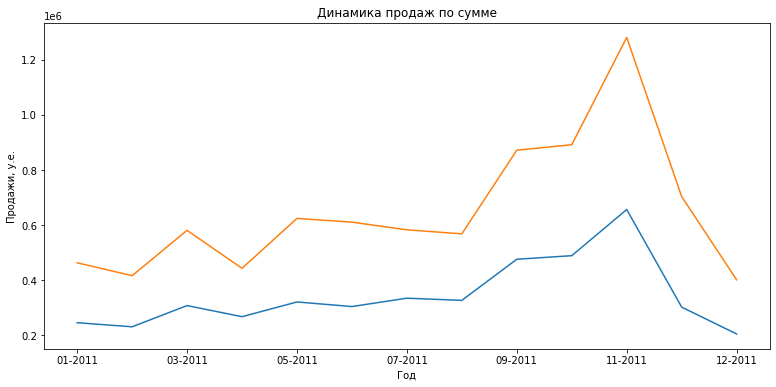

In [103]:
df_month_UK = df_UK.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()
df_month_UK['Quantity'].plot(title='Динамика продаж в единицах только Великобритания', 
                                        xlabel='Год', 
                                        ylabel='Продажи, ед.')
df_month_UK['SumInvoice'].plot(title='Динамика продаж по сумме', 
                                        xlabel='Год', 
                                        ylabel='Продажи, у.е.')

<AxesSubplot:title={'center':'Динамика продаж в единицах другие страны'}, xlabel='Год', ylabel='Продажи, в у.е.'>

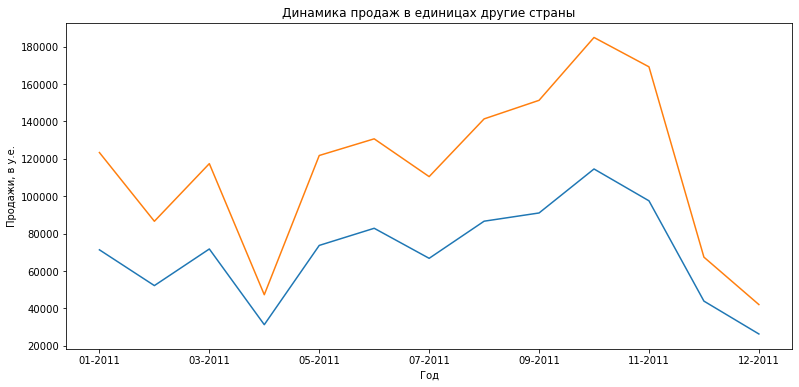

In [106]:
df_other_country = df.loc[df['Country'] != 'United Kingdom']
df_month_other_country = df_other_country.loc[:, ['Quantity', 'SumInvoice', 'InvoiceDate']].groupby('InvoiceDate').sum()
df_month_other_country['Quantity'].plot(title='Динамика продаж в единицах другие страны', 
                                        xlabel='Год', 
                                        ylabel='Продажи, ед.')
df_month_other_country['SumInvoice'].plot(title='Динамика продаж в единицах другие страны', 
                                        xlabel='Год', 
                                        ylabel='Продажи, в у.е.')

In [93]:
df_other_country_count = df_other_country.pivot_table(index = 'InvoiceDate', columns = 'Country', values = 'Quantity', aggfunc = 'sum', fill_value = 0)
df_other_country_count

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,Unspecified
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
01-2011,5644,0,-54,775,0,0,255,144,0,0,...,2051,0,0,1091,3825,3092,2988,0,0,0
02-2011,8659,340,0,1080,0,0,935,2189,346,222,...,551,0,80,0,852,249,1098,0,496,0
03-2011,10329,972,0,1753,0,88,2104,1005,0,879,...,1620,0,-5,0,2519,5262,979,0,0,0
04-2011,116,308,0,1162,356,0,96,-4,-39,0,...,951,0,0,1384,948,306,770,137,0,282
05-2011,9073,471,260,1809,0,504,221,0,0,366,...,311,0,0,0,1448,2828,2241,0,0,803
06-2011,15973,-6,0,2216,0,1092,836,356,0,1533,...,417,0,0,0,1516,399,3956,0,0,78
07-2011,5185,571,0,1660,0,1026,0,0,0,240,...,1432,0,0,2160,3420,6003,1696,0,0,1053
08-2011,12570,788,0,2034,0,52,2008,0,0,328,...,1014,0,0,0,1582,1302,2958,0,0,185
09-2011,4043,0,0,1929,0,0,763,33,0,1604,...,897,0,0,0,2655,4342,4224,0,485,258


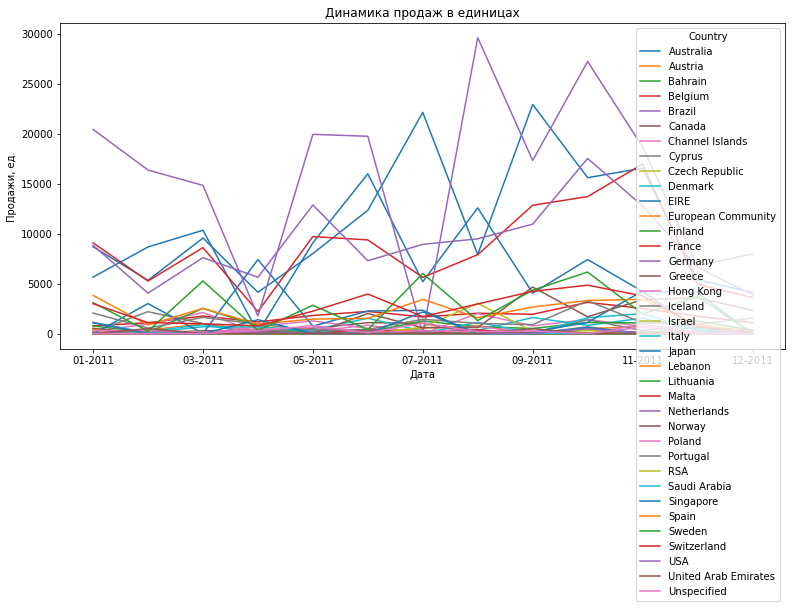

In [94]:
#нужно оставить только топ-5(?) стран по обьему продаж в единицах (и по сумме продаж так же)

ax = df_other_country_count.plot(title='Динамика продаж в единицах', 
                             xlabel='Дата', 
                             ylabel='Продажи, ед.')

<AxesSubplot:title={'center':'Динамика продаж по сумме'}, xlabel='Год', ylabel='Продажи, у.е.'>

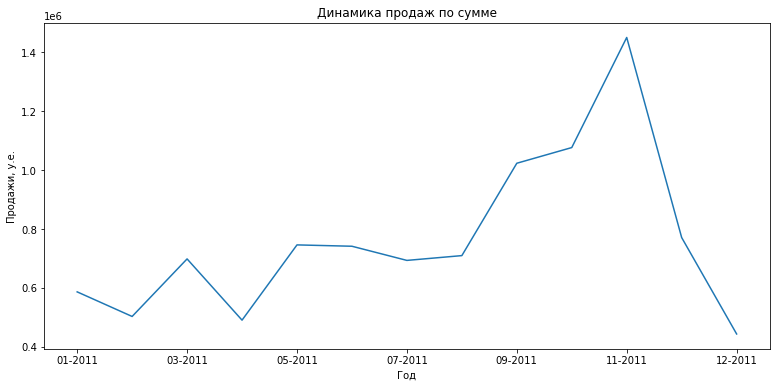

In [99]:
df_month['SumInvoice'].plot(title='Динамика продаж по сумме', 
                                        xlabel='Год', 
                                        ylabel='Продажи, у.е.')

In [107]:
import seaborn as sns

In [79]:
region = df.Country.unique()
print(region)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [171]:
#суммарные покупки каждого пользователя

df_customer_sum = df.groupby('CustomerID').sum()
df_customer_sum.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4363 entries, 12346.0 to 18287.0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   4363 non-null   int64  
 1   UnitPrice  4363 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 102.3 KB


In [172]:
df_customer_sum.head(30)

,Quantity,UnitPrice
CustomerID,,
12346.0,0,2.08
12347.0,2458,481.21
12348.0,2332,18.71
12349.0,630,305.10
12350.0,196,25.30
12352.0,463,330.50
12353.0,20,24.30
12354.0,530,261.22
12355.0,240,54.65


In [9]:
df_date = df.groupby('InvoiceDate').sum()
df_date.head(20)

,Quantity,UnitPrice,CustomerID
InvoiceDate,,,
01-2011,308966,172752.800,3.319198e+08
02-2011,277989,127448.770,3.117809e+08
03-2011,351872,171486.510,4.223298e+08
04-2011,289098,129164.961,3.541194e+08
05-2011,380391,190685.460,4.400088e+08
06-2011,341623,200717.340,4.264710e+08
07-2011,391116,171906.791,4.209226e+08
08-2011,406199,150385.680,4.219478e+08
09-2011,549817,199235.212,6.229373e+08


In [96]:
df_cd = df.groupby('StockCode').sum()
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 10002 to DCGSSGIRL
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    3921 non-null   int64  
 1   UnitPrice   3921 non-null   float64
 2   CustomerID  3921 non-null   float64
 3   SumInvoice  3921 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 153.2+ KB


In [11]:
df_customer_order = df.groupby('InvoiceNo').sum()
df_customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25900 entries, 536365 to C581569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    25900 non-null  int64  
 1   UnitPrice   25900 non-null  float64
 2   CustomerID  25900 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 809.4+ KB


In [12]:
df_customer_order.sort_values('Quantity')

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
C581484,-80995,2.08,16446.0
C541433,-74215,1.04,12346.0
556691,-9600,0.00,0.0
556690,-9600,0.00,0.0
C536757,-9360,0.03,15838.0
...,...,...,...
574941,14149,498.89,0.0
563076,14730,269.39,1742874.0
556917,15049,283.57,1713270.0


In [13]:
Customers = df.CustomerID.unique().tolist()
len(Customers)

4373

In [53]:
Product = df.Description.unique().tolist()
len(Product)

4224

In [15]:
Invoice = df.InvoiceNo.unique().tolist()
len(Invoice)
#print(Invoice)

25900

In [89]:
regex = re.compile(r'\d{6}')
filtered = [i for i in Invoice if not regex.match(i)]
regex2 = re.compile(r'C\d{6}')
filtered = [i for i in filtered if not regex2.match(i)]
print(filtered)

['A563185', 'A563186', 'A563187']
